Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

# Predicting the number of your customers

## Introduction

Suppose you have a shop. Every month you count the total number of your customers who bought from your shop. To simplify, we think of people buying one unit from your shop or nothing. 


Your customers are of two types:
* some are "returning" customers (i.e. they also bought last month) and 
* the others are new (did not buy last month)

So we will not worry about customers who, say, bought two months ago but not last month.

In this notebook, we first generate the data ourselves (so that you fully understand the structure of the data) and then we analyze this data.

## Importing libraries

We first import the libraries that we need.

In [2]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Model

We will generate the data with the following model.

Let $x_t$ denote the logarithm of the number of customers in period $t$. We assume that $x_t$ evolves over time as follows:

$$
x_t = \rho x_{t-1} + u_t
$$

where $u_t$ is normally distributed with mean $\mu_u \geq 0$ and standard deviation $\sigma_u \geq 0$ and $\rho \in [0,1]$. Hence, there is a fraction $\rho$ of previous period customers that return to buy this period and there is an inflow $u_t$ of new customers in period $t$.


-------------

**Exercise**

What is an advantage of defining $x_t$ as the logarithm of the number of customers? [hint: what would you need to "worry" about if $x_t$ denotes the number of customers?]

--------------

YOUR ANSWER HERE

We assume that both $\mu$ and $\rho$ are a function of the price that is charged. If you charge a high price, fewer customers will return and also the inflow of new customers will be lower.

We generate data for 24 months. The code below starts from today and generates dates with a Monthly frequency back into the past years. We define how $\rho$ and $\mu$ depend on the price $p$ that the shop charges in a period.

Finally, we create a pandas dataframe `df_customers` with this data. 

In [3]:
number_of_periods = 24
todays_date = datetime.datetime.now().date()
index = pd.date_range(end = todays_date, periods=number_of_periods, freq='M')
columns = ['log number of customers']

def mu(m,p):
    return m*(1-p)

def rho(r,p):
    return r*(1-p)

sigma = 1.0

p_0 = [0.2]
p_1 = [0.6]
period_0 = 12
period_1 = number_of_periods+1-period_0
vector_p = period_0*p_0 + period_1*p_1

x_0 = 10
x = []
x.append(x_0)
for t in range(1,number_of_periods+1):
    u = np.random.normal(mu(2,vector_p[t]), sigma)
    x.append(rho(0.5,vector_p[t])*x[t-1]+u)
    
df_customers = pd.DataFrame(x[1:], index=index, columns=columns)

---------

**Exercise**

Explain what the code above does:

* what is `vector_p` and how is it generated?
* what is the type of `x`? How is this vector generated?
* show what the first couple of rows of the `df_customers` look like.

YOUR ANSWER HERE

In [5]:
#vector_p is een lijst van 25 prijzen, list x list geeft eerste 12 cijfers 0.2 en de andere 13, 0.6 als uitkomsten in een nieuwe list.
#x= empty list, but then we add 10 
df_customers.head(5) 

,log number of customers
2016-04-30,5.362746
2016-05-31,3.919311
2016-06-30,4.740187
2016-07-31,5.300838
2016-08-31,5.232521


-----------

**Exercise**

Calculate the number of customers in each of the periods. [hint: you may want to check numpy's `exp` function]

-----------

In [10]:
df_customers['number_of_customers'] = np.exp(df_customers['log number of customers'])

-----------

**Exercise**

Calculate the average number of customers over the period of 24 months. [hint: check the datacamp course on pandas or google "python pandas average" to see how to calculate an average in a dataframe]

-----------

In [21]:
df_customers['number_of_customers'].mean()


63.812344200461403

In [23]:
#1st row
df_customers.head(1)
df_customers.iloc[0]
df_customers.loc['2016-05-31']
#1st column
df_customers.iloc[:,0]
#1st row 2nd column
df_customers.iloc[0,1]

213.30997298802791

On the basis of the mean, you might conclude that you should expect around 30 customers on average (this can be different in your notebook as we are using random numbers here).

-----------

**Exercise**

To get an idea on whether this is realistic, also calculate the median number of customers. What do you learn from this?

--------------

In [24]:
df_customers['number_of_customers'].median()

6.849519773392762

#we have very many months with a small number of customers and a few with large nr of customers

To get some idea on how the number of customers varies over time, we will plot the number of customers together with two moving averages: one moving average over 3 months, the other over 6 months.

In [25]:
df_customers['MA_3'] = df_customers['number_of_customers'].rolling(window=3).mean()
df_customers['MA_6'] = df_customers['number_of_customers'].rolling(window=6).mean()

------------

**Exercise**

Plot the number of customers and the moving averages defined above.

-------------

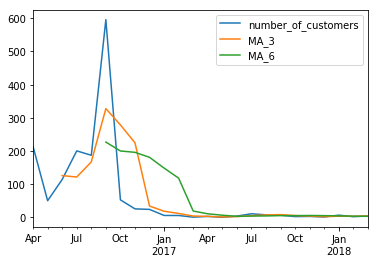

In [29]:
df_customers['number_of_customers'].plot()
df_customers['MA_3'].plot()
df_customers['MA_6'].plot()
plt.legend()
plt.show()

Consider the first couple of rows of the dataframe `df_customers`.

----------

**Exercise**

Why does "NaN" mean and why do they appear? Hint: use google if you do not know what "NaN" stands for.

-----------

In [30]:
df_customers.head(10)

,log number of customers,number_of_customers,MA_3,MA_6
2016-04-30,5.362746,213.309973,NaN,NaN
2016-05-31,3.919311,50.365720,NaN,NaN
2016-06-30,4.740187,114.455579,126.043757,NaN
2016-07-31,5.300838,200.504828,121.775376,NaN
2016-08-31,5.232521,187.264261,167.408223,NaN
2016-09-30,6.389670,595.660219,327.809769,226.926763
2016-10-31,3.970346,53.002856,278.642445,200.208910
2016-11-30,3.252495,25.854762,224.839279,196.123751
2016-12-31,3.189573,24.278063,34.378560,181.094165
2017-01-31,1.797617,6.035249,18.722692,148.682568


YOUR ANSWER HERE

--------------

**Exercise**

Add a column to `df_customers` with the price per period.

------------

In [32]:
print(len(df_customers['number_of_customers']))
print(len(vector_p))

24
25


In [35]:
df_customers['price']= vector_p[1:]


Assume that your costs per sale equal 0.1.

-----------

**Exercise**

Add a column `profits` to the dataframe.

-----------


In [37]:
df_customers['profits']= (df_customers['price']-0.1)*df_customers['number_of_customers']
df_customers['profits'].head()

2016-04-30    21.330997
2016-05-31     5.036572
2016-06-30    11.445558
2016-07-31    20.050483
2016-08-31    18.726426
Freq: M, Name: profits, dtype: float64

------------

**Exercise**

Plot the number of customers against profit. Explain the shape of curve that you see.

------------

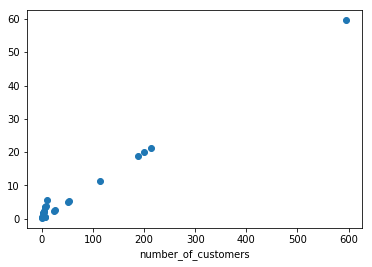

In [42]:
plt.scatter(df_customers['number_of_customers'],df_customers['profits'])
plt.xlabel ('number_of_customers')
plt.show()

each point reflects nr of customers and profit. 